<a href="https://colab.research.google.com/github/psiqsofia/nuevo/blob/main/citas_por_especialidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Manejo de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Estadística y machine learning
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Citas_por_Especialidad.csv'


df = pd.read_csv(file_path, encoding="latin-1", sep=";")

df.head()

Mounted at /content/drive


,ESPECIALIDAD,FECHA CITA,REGIMEN,CODIGO ENTIDAD,NOMBRE DE LA ENTIDAD DEL USUARIO,FECHA NACIMINETO,GENERO,CIUDAD RESIDENCIA,EDAD
0,Anesteciología,2022-01-17,SUBSIDIADO,ESS053,ASMETSALUD,2/11/2000,F,PUERTO BOYACA,21
1,Anesteciología,2022-01-13,SUBSIDIADO,ESS053,ASMETSALUD,2/11/2000,F,PUERTO BOYACA,21
2,Anesteciología,2022-01-06,CONTRIBUTIVO,CCF090,CAJA COMPENSACION FAMILIAR CAJACOPI,20/03/1944,M,PUERTO BOYACA,77
3,Anesteciología,2022-01-21,SUBSIDIADO,CCF090,CAJA COMPENSACION FAMILIAR CAJACOPI,3/10/1996,F,PUERTO BOYACA,25
4,Anesteciología,2022-01-11,SUBSIDIADO,ESS091,EMPRESA PROMOTORA DE SALUD ECOOPSOS EPS S.A.S,2/07/1978,M,PUERTO BOYACA,43


In [4]:
df['ESPECIALIDAD'].value_counts()

,count
ESPECIALIDAD,
Medicina General,43661
Odontología,8159
Imagen-Eco,6982
Imageneología,6836
PYP,6005
Medicina Interna,5618
Imagen-Tomografia,5120
Nutricionista,4152
Optometria,3487


In [5]:
!pip install unidecode

import unidecode

# Renombrar todas las columnas en minúsculas, sin tildes y con "_"
df.columns = [unidecode.unidecode(c).lower().replace(" ", "_") for c in df.columns]
df["especialidad"] = df["especialidad"].str.lower().str.strip()
df["especialidad"] = df["especialidad"].apply(lambda x: unidecode.unidecode(x))
df['especialidad'].value_counts()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 6.0 MB/s eta 0:00:00


,count
especialidad,
medicina general,43661
odontologia,8159
imagen-eco,6982
imageneologia,6836
pyp,6005
medicina interna,5618
imagen-tomografia,5120
nutricionista,4152
optometria,3487


In [6]:
bins = list(range(0, 101, 10))  # 0, 10, 20, ..., 100
labels = [f"{i}-{i+9}" for i in range(0, 100, 10)]

# Crear columna nueva con rango de edad
df['rango_edad'] = pd.cut(df['edad'], bins=bins, labels=labels, right=False)
df

,especialidad,fecha_cita,regimen,codigo_entidad,nombre_de_la_entidad_del_usuario,fecha_nacimineto,genero,ciudad_residencia,edad,rango_edad
0,anesteciologia,2022-01-17,SUBSIDIADO,ESS053,ASMETSALUD,2/11/2000,F,PUERTO BOYACA,21,20-29
1,anesteciologia,2022-01-13,SUBSIDIADO,ESS053,ASMETSALUD,2/11/2000,F,PUERTO BOYACA,21,20-29
2,anesteciologia,2022-01-06,CONTRIBUTIVO,CCF090,CAJA COMPENSACION FAMILIAR CAJACOPI,20/03/1944,M,PUERTO BOYACA,77,70-79
3,anesteciologia,2022-01-21,SUBSIDIADO,CCF090,CAJA COMPENSACION FAMILIAR CAJACOPI,3/10/1996,F,PUERTO BOYACA,25,20-29
4,anesteciologia,2022-01-11,SUBSIDIADO,ESS091,EMPRESA PROMOTORA DE SALUD ECOOPSOS EPS S.A.S,2/07/1978,M,PUERTO BOYACA,43,40-49
...,...,...,...,...,...,...,...,...,...,...
126773,fisioterapia,2022-10-21,SUBSIDIADO,ESS091,EMPRESA PROMOTORA DE SALUD ECOOPSOS EPS S.A.S,30/12/2004,M,PUERTO BOYACA,17,10-19
126774,fisioterapia,2022-10-24,SUBSIDIADO,ESS091,EMPRESA PROMOTORA DE SALUD ECOOPSOS EPS S.A.S,29/04/1990,M,PUERTO BOYACA,32,30-39
126775,ginecologia,2022-10-26,CONTRIBUTIVO,ESS091,EMPRESA PROMOTORA DE SALUD ECOOPSOS EPS S.A.S,15/01/1966,M,PUERTO BOYACA,56,50-59
126776,ginecologia,2022-10-23,CONTRIBUTIVO,ESS091,EMPRESA PROMOTORA DE SALUD ECOOPSOS EPS S.A.S,12/03/1994,F,PUERTO NARE,28,20-29


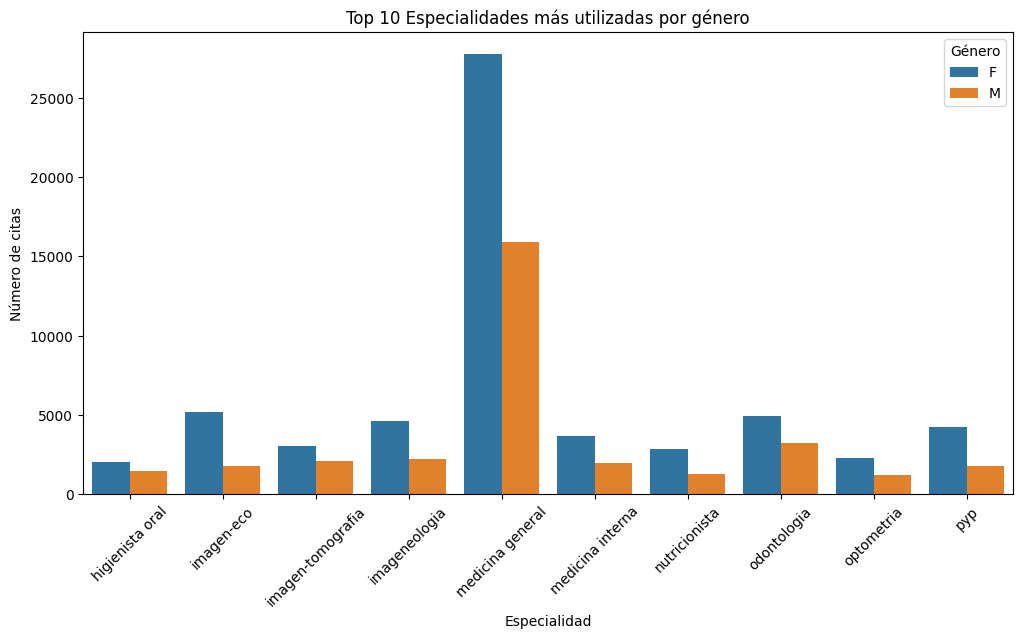

In [7]:
df_group = df.groupby(["especialidad", "genero"]).size().reset_index(name="conteo")

# Filtrar top 10 especialidades más usadas
top10 = df["especialidad"].value_counts().head(10).index
df_top10 = df_group[df_group["especialidad"].isin(top10)]

# Gráfico de barras apiladas
plt.figure(figsize=(12,6))
sns.barplot(data=df_top10, x="especialidad", y="conteo", hue="genero")

plt.title("Top 10 Especialidades más utilizadas por género")
plt.xlabel("Especialidad")
plt.ylabel("Número de citas")
plt.xticks(rotation=45)
plt.legend(title="Género")
plt.show()

/tmp/ipython-input-3638691397.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_age_group = df.groupby(["especialidad", "rango_edad"]).size().reset_index(name="conteo")


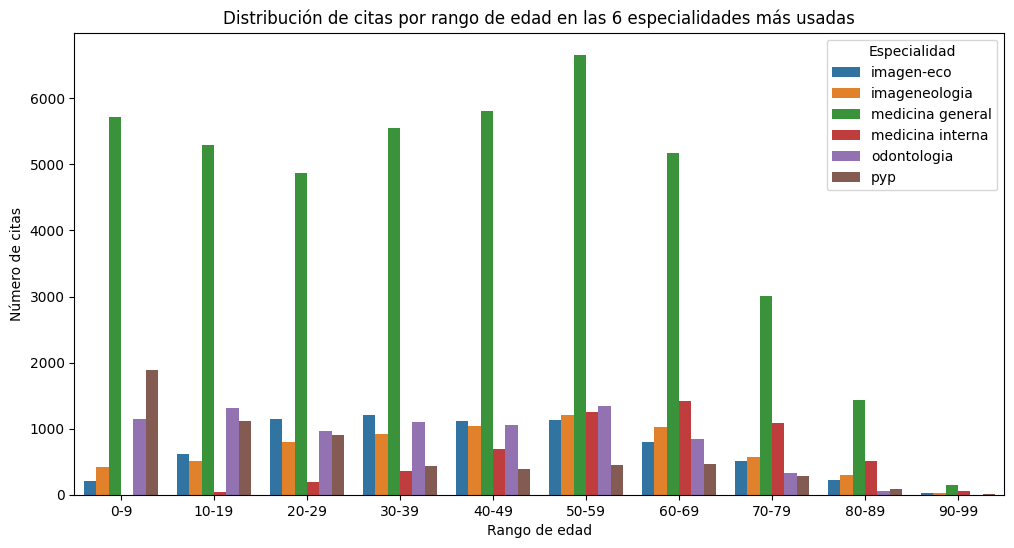

In [8]:
df_age_group = df.groupby(["especialidad", "rango_edad"]).size().reset_index(name="conteo")

# Filtrar top 6 especialidades
top6 = df["especialidad"].value_counts().head(6).index
df_top6_age = df_age_group[df_age_group["especialidad"].isin(top6)]

# Gráfico
plt.figure(figsize=(12,6))
sns.barplot(data=df_top6_age, x="rango_edad", y="conteo", hue="especialidad")

plt.title("Distribución de citas por rango de edad en las 6 especialidades más usadas")
plt.xlabel("Rango de edad")
plt.ylabel("Número de citas")
plt.legend(title="Especialidad")
plt.show()


In [9]:
df["regimen"].unique()

array(['SUBSIDIADO', 'CONTRIBUTIVO', 'SOAT Y ARL', 'ESPECIAL',
       'VICUNLADO', 'PARTICULAR', 'Subsidiado', 'Contributivo',
       'Particular', 'Especial', 'particular'], dtype=object)

In [10]:
df['regimen'] = (
    df['regimen']
    .str.lower()                # todo en minúsculas
    .str.strip()                # quitar espacios extras
    .apply(lambda x: unidecode.unidecode(x))  # quitar tildes
)

# Unificar categorías manualmente (por si quedaron duplicados)
df['regimen'] = df['regimen'].replace({
    'subsidiado': 'subsidiado',
    'contributivo': 'contributivo',
    'soat y arl': 'soat y arl',
    'especial': 'especial',
    'vicunlado': 'vinculado',   # corregimos error de digitación
    'particular': 'particular'
})

# Ver resultado único
print(df['regimen'].unique())

['subsidiado' 'contributivo' 'soat y arl' 'especial' 'vinculado'
 'particular']


In [11]:
import pandas as pd

# Filtrar solo Medicina General
df_med_gen = df[df['especialidad'].str.lower() == 'medicina general'].copy()

# Asegurar que la columna fecha sea datetime
df_med_gen['fecha_cita'] = pd.to_datetime(df_med_gen['fecha_cita'], errors='coerce')

# Crear columnas de mes y día
df_med_gen['mes'] = df_med_gen['fecha_cita'].dt.month
df_med_gen['dia'] = df_med_gen['fecha_cita'].dt.day

# Crear rangos de edad
bins = [0, 12, 18, 30, 45, 60, 100]
labels = ['0-12', '13-18', '19-30', '31-45', '46-60', '60+']
df_med_gen['rango_edad'] = pd.cut(df_med_gen['edad'], bins=bins, labels=labels, right=True)

# --- Análisis ---

# 1. Por sexo
sexo_counts = df_med_gen['genero'].value_counts()

# 2. Por mes
mes_counts = df_med_gen['mes'].value_counts().sort_index()

# 3. Por día
dia_counts = df_med_gen['dia'].value_counts().sort_index()

# 4. Por régimen
regimen_counts = df_med_gen['regimen'].value_counts()

# 5. Por rango de edad
edad_counts = df_med_gen['rango_edad'].value_counts().sort_index()

# --- Mostrar resultados ---
print("Consultas de Medicina General por Sexo:\n", sexo_counts, "\n")
print("Consultas de Medicina General por Mes:\n", mes_counts, "\n")
print("Consultas de Medicina General por Día:\n", dia_counts, "\n")
print("Consultas de Medicina General por Régimen:\n", regimen_counts, "\n")
print("Consultas de Medicina General por Rango de Edad:\n", edad_counts, "\n")


Consultas de Medicina General por Sexo:
 genero
F    27742
M    15919
Name: count, dtype: int64 

Consultas de Medicina General por Mes:
 mes
1     4781
2     5103
3     4982
4     4569
5     4843
6     4454
7     4610
8     5232
9     4964
10     123
Name: count, dtype: int64 

Consultas de Medicina General por Día:
 dia
1     1441
2     1489
3     1294
4     1335
5     1469
6     1548
7     1712
8     1634
9     1579
10    1205
11    1620
12    1570
13    1328
14    1646
15    1220
16    1466
17    1382
18    1491
19    1255
20     987
21    1338
22    1619
23    1501
24    1476
25    1573
26    1614
27    1162
28    1491
29    1321
30    1026
31     869
Name: count, dtype: int64 

Consultas de Medicina General por Régimen:
 regimen
subsidiado      34368
contributivo     8782
soat y arl        192
particular        157
especial          118
vinculado          44
Name: count, dtype: int64 

Consultas de Medicina General por Rango de Edad:
 rango_edad
0-12     6411
13-18    3485
19-30 

/tmp/ipython-input-1876061119.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sexo_edad = df_med_gen.groupby(['genero', 'rango_edad']).size().unstack(fill_value=0)


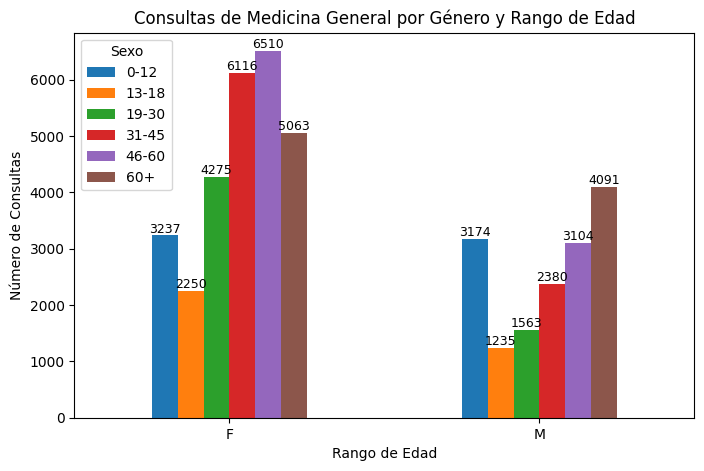

In [12]:
# --- Agrupamos por sexo y rango de edad ---
sexo_edad = df_med_gen.groupby(['genero', 'rango_edad']).size().unstack(fill_value=0)

# --- Gráfico de barras agrupadas ---
ax = sexo_edad.plot(kind='bar', figsize=(8,5))

plt.title("Consultas de Medicina General por Género y Rango de Edad")
plt.xlabel("Rango de Edad")
plt.ylabel("Número de Consultas")
plt.legend(title="Sexo")
plt.xticks(rotation=0)

# --- Agregar los números encima de cada barra ---
for p in ax.patches:
    ax.annotate(str(int(p.get_height())),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9)

plt.show()



Se evidencia que las mujeres asisten más a citas médicas. Respecto a la especialidad más usada (Medicina general) se observa que hasta los 12 años hay una proporción equivalente según sexo, sin embargo hay una caida de aproximadamente 35% de diferencia cuando inicia la adolescencia, la cual continúa durante el resto de rangos etarios. Esto indica que los varones asisten menos al hospital, pues en el municipio hay una proporcion de hombres y mujeres equitativa.

/tmp/ipython-input-649940458.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot_all = df.groupby(["rango_edad", "genero"]).size().reset_index(name="conteo")


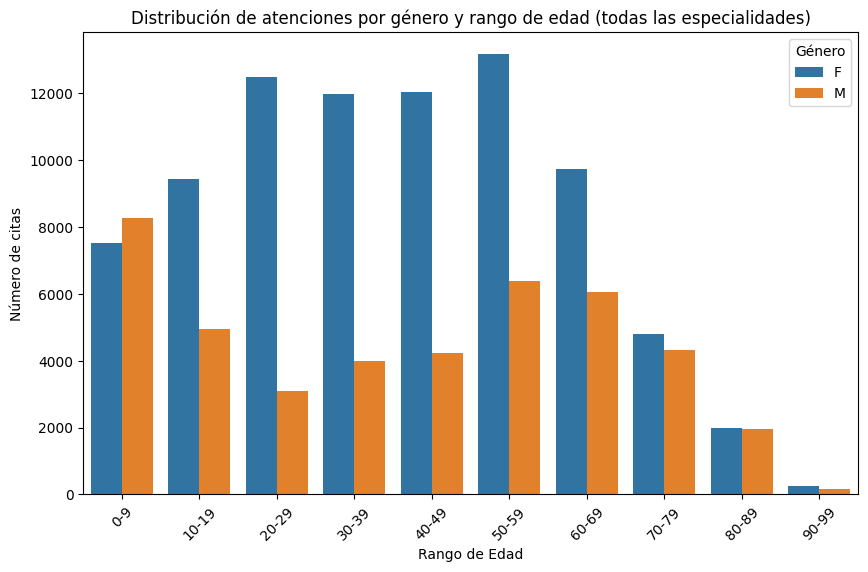

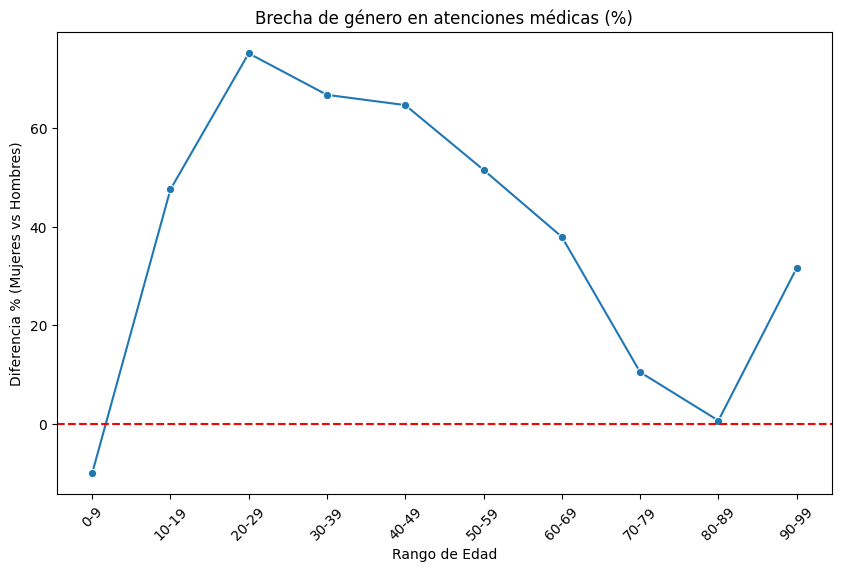

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar por rango de edad y género en todo el dataset (todas las especialidades)
pivot_all = df.groupby(["rango_edad", "genero"]).size().reset_index(name="conteo")

# --- 📊 Gráfico de barras acumuladas ---
plt.figure(figsize=(10,6))
sns.barplot(data=pivot_all, x="rango_edad", y="conteo", hue="genero")
plt.title("Distribución de atenciones por género y rango de edad (todas las especialidades)")
plt.xlabel("Rango de Edad")
plt.ylabel("Número de citas")
plt.xticks(rotation=45)
plt.legend(title="Género")
plt.show()

# --- 📈 Diferencia porcentual ---
pivot_table_all = pivot_all.pivot(index="rango_edad", columns="genero", values="conteo").fillna(0)
pivot_table_all["dif_pct"] = ((pivot_table_all["F"] - pivot_table_all["M"]) / pivot_table_all["F"]) * 100

plt.figure(figsize=(10,6))
sns.lineplot(data=pivot_table_all, x=pivot_table_all.index, y="dif_pct", marker="o")
plt.title("Brecha de género en atenciones médicas (%)")
plt.xlabel("Rango de Edad")
plt.ylabel("Diferencia % (Mujeres vs Hombres)")
plt.xticks(rotation=45)
plt.axhline(0, color="red", linestyle="--")
plt.show()


In [14]:
# Agrupamos por rango de edad y género
df_prop = df.groupby(["rango_edad", "genero"]).size().reset_index(name="conteo")

# Convertimos a tabla cruzada (pivot table)
df_pivot = df_prop.pivot(index="rango_edad", columns="genero", values="conteo").fillna(0)

# Total por rango
df_pivot["total"] = df_pivot["F"] + df_pivot["M"]

# Proporciones
df_pivot["prop_mujeres"] = df_pivot["F"] / df_pivot["total"] * 100
df_pivot["prop_hombres"] = df_pivot["M"] / df_pivot["total"] * 100

# Diferencia en puntos porcentuales (mujeres - hombres)
df_pivot["diferencia_pct"] = df_pivot["prop_mujeres"] - df_pivot["prop_hombres"]

df_pivot.reset_index(inplace=True)
print(df_pivot)


genero rango_edad      F     M  total  prop_mujeres  prop_hombres  \
0             0-9   7516  8272  15788     47.605777     52.394223   
1           10-19   9440  4947  14387     65.614791     34.385209   
2           20-29  12476  3089  15565     80.154192     19.845808   
3           30-39  11981  3976  15957     75.083036     24.916964   
4           40-49  12034  4244  16278     73.928001     26.071999   
5           50-59  13165  6375  19540     67.374616     32.625384   
6           60-69   9746  6045  15791     61.718701     38.281299   
7           70-79   4812  4307   9119     52.768944     47.231056   
8           80-89   1972  1959   3931     50.165352     49.834648   
9           90-99    237   162    399     59.398496     40.601504   

genero  diferencia_pct  
0            -4.788447  
1            31.229582  
2            60.308384  
3            50.166071  
4            47.856002  
5            34.749232  
6            23.437401  
7             5.537888  
8             0

/tmp/ipython-input-2633847463.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_prop = df.groupby(["rango_edad", "genero"]).size().reset_index(name="conteo")


El análisis evidencia una brecha de género en la utilización de servicios médicos que inicia en la adolescencia, con un 31 % más de consultas femeninas, y que se intensifica en la juventud y adultez temprana, alcanzando diferencias de hasta el 60 %. Este patrón sugiere que los varones tienden a excluirse progresivamente del cuidado preventivo en salud, lo cual se relaciona con las prácticas culturales de percepción de género que asocian la masculinidad con fortaleza y autosuficiencia, reduciendo la búsqueda de ayuda médica. Esta conducta tiene consecuencias observables en la salud pública, posiblemente asociada con una mayor mortalidad accidental masculina.

**RESPECTO A LA MORTALIDAD**


Entre 2017 y 2021, las estadísticas de mortalidad del municipio muestran que las principales causas de muerte tanto en hombres como mujeres se concentran en enfermedades del sistema circulatorio, enfermedades transmisibles. La tercera causa de mortalidad femenina se debe a neoplasias, mientras que en los hombres el tercer factor más relevante son las causas externas (accidentes, violencias). A continuación se analizan las especialidades que atienden estas situaciones.

/tmp/ipython-input-2258767550.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clave["rango_edad"] = df_clave["rango_edad"].astype(str)


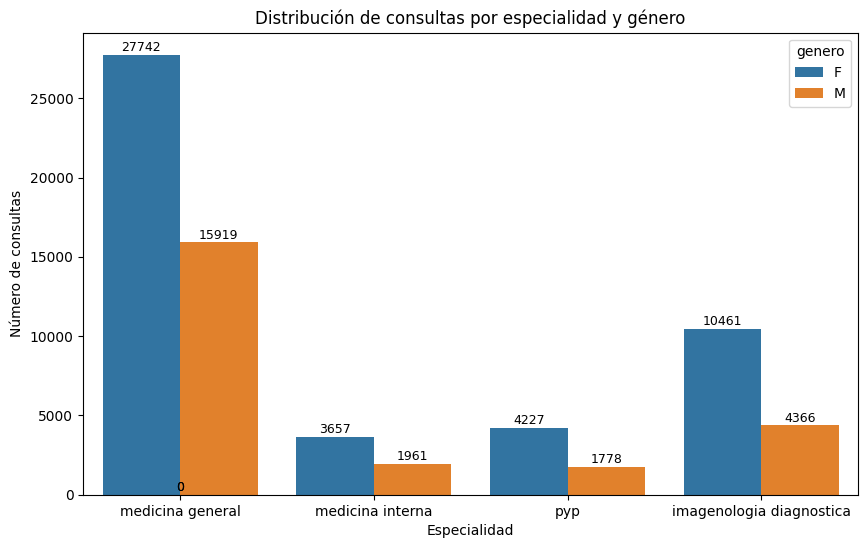

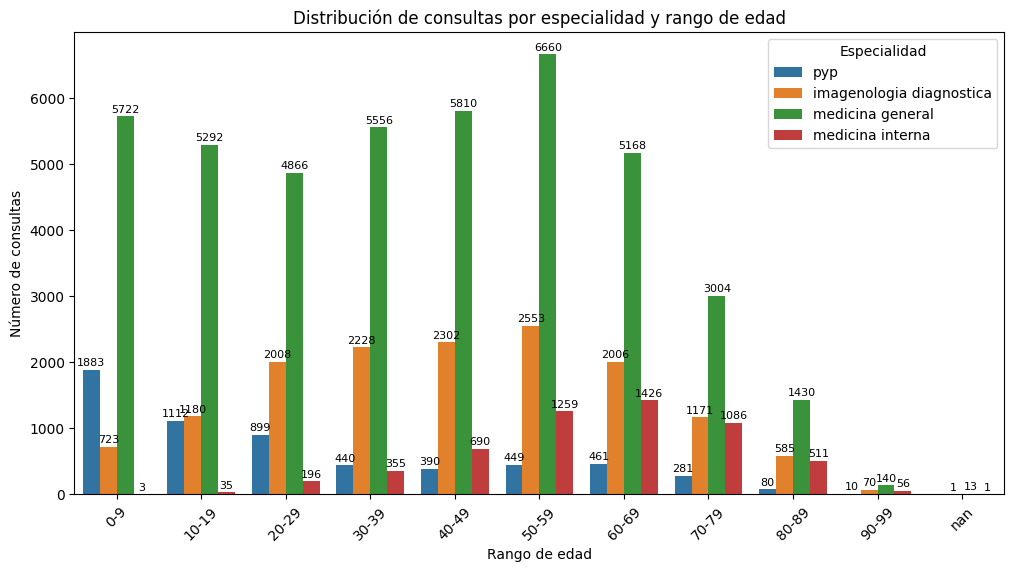

In [15]:
# --- 1. Crear nueva columna para unificar especialidades ---
df["especialidad_unificada"] = df["especialidad"]

# Unificar todas las variantes de imagenología en "imagenologia diagnostica"
df["especialidad_unificada"] = df["especialidad_unificada"].replace({
    "imagen-rx": "imagenologia diagnostica",
    "imagen-eco": "imagenologia diagnostica",
    "imagen-ta mapa": "imagenologia diagnostica",
    "imageneologia": "imagenologia diagnostica"
})

# --- 2. Filtrar solo las especialidades relevantes ---
especialidades_clave = ["medicina general", "medicina interna", "pyp", "imagenologia diagnostica"]
df_clave = df[df["especialidad_unificada"].isin(especialidades_clave)]

# --- 3. Asegurar que rango_edad sea texto para evitar errores ---
df_clave["rango_edad"] = df_clave["rango_edad"].astype(str)

# --- 4. Gráfico por género ---
plt.figure(figsize=(10,6))
sns.countplot(data=df_clave, x="especialidad_unificada", hue="genero", order=especialidades_clave)
plt.title("Distribución de consultas por especialidad y género")
plt.xlabel("Especialidad")
plt.ylabel("Número de consultas")

# Etiquetas
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.show()

# --- 5. Gráfico por rango de edad ---
plt.figure(figsize=(12,6))
sns.countplot(data=df_clave, x="rango_edad", hue="especialidad_unificada", order=sorted(df_clave["rango_edad"].unique()))
plt.title("Distribución de consultas por especialidad y rango de edad")
plt.xlabel("Rango de edad")
plt.ylabel("Número de consultas")
plt.xticks(rotation=45)

# Etiquetas
for p in plt.gca().patches:
    height = int(p.get_height())
    if height > 0:
        plt.gca().annotate(f'{height}',
                           (p.get_x() + p.get_width() / 2., height),
                           ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                           textcoords='offset points')

plt.legend(title="Especialidad")
plt.show()


/tmp/ipython-input-2703339920.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_group = df_sel.groupby(["rango_edad", "especialidad"]).size().reset_index(name="consultas")
/tmp/ipython-input-2703339920.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_group["proporcion"] = df_group.groupby("rango_edad")["consultas"].transform(lambda x: x / x.sum() * 100)


<Figure size 1200x600 with 0 Axes>

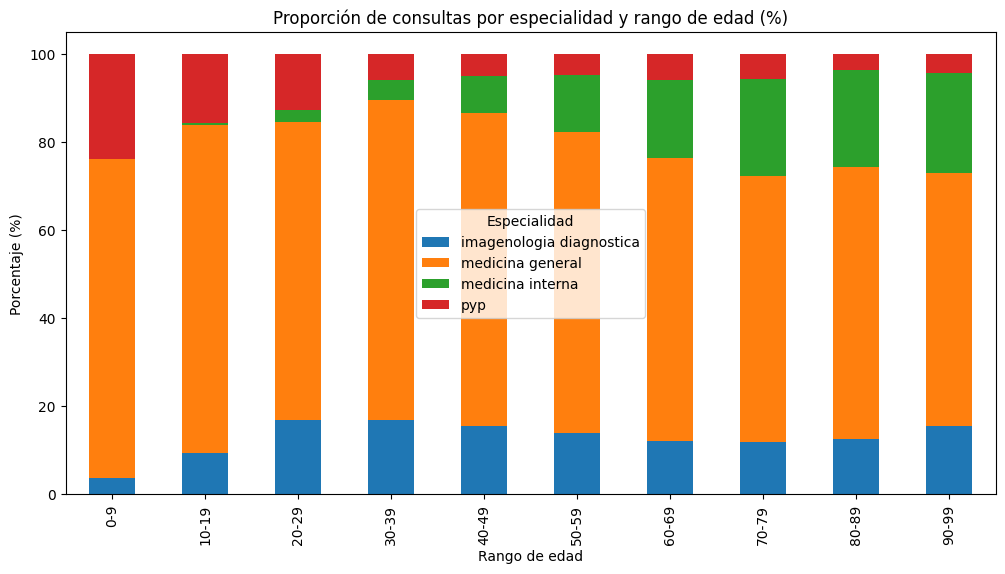

In [16]:
df["especialidad"] = df["especialidad"].str.lower().str.strip()

# Reemplazar todas las variantes por "imagenologia diagnostica"
df["especialidad"] = df["especialidad"].replace({
    "imageneología": "imagenologia diagnostica",
    "imagen-eco": "imagenologia diagnostica",
    "imagen-rx": "imagenologia diagnostica",
    "imagen-ta mapa": "imagenologia diagnostica"
})

# --- 2. Seleccionar solo especialidades de interés ---
especialidades_interes = ["pyp", "imagenologia diagnostica", "medicina general", "medicina interna"]
df_sel = df[df["especialidad"].isin(especialidades_interes)]

# --- 3. Agrupar por rango de edad y especialidad ---
df_group = df_sel.groupby(["rango_edad", "especialidad"]).size().reset_index(name="consultas")

# --- 4. Calcular proporción dentro de cada rango de edad ---
df_group["proporcion"] = df_group.groupby("rango_edad")["consultas"].transform(lambda x: x / x.sum() * 100)


# Gráfico de barras apiladas
plt.figure(figsize=(12,6))
df_group.pivot(index="rango_edad", columns="especialidad", values="proporcion").plot(
    kind="bar", stacked=True, figsize=(12,6)
)

plt.title("Proporción de consultas por especialidad y rango de edad (%)")
plt.ylabel("Porcentaje (%)")
plt.xlabel("Rango de edad")
plt.legend(title="Especialidad")
plt.show()


El análisis de la distribución proporcional de consultas muestra que PYP tiene un peso importante en los primeros años de vida, asociado a controles de crecimiento, vacunación y actividades preventivas en niñez. Sin embargo, esta proporción cae a partir de la adolescencia y desaparece prácticamente en la adultez. En contraste, en las edades productivas y avanzadas predominan especialidades orientadas al diagnóstico y tratamiento de enfermedades (Imagenología diagnóstica y Medicina Interna), lo que evidencia un modelo asistencial reactivo más que preventivo. Esto implica que el sistema concentra esfuerzos cuando la enfermedad ya se ha manifestado, en lugar de fortalecer estrategias de promoción y prevención en población adulta.


Para comprender mejor las necesidades de salud en Puerto Boyacá y relacionarlas con las principales causas de mortalidad y morbilidad, se agruparon las especialidades médicas en tres bloques estratégicos: **cardiovascular–metabólico, musculoesquelético y salud mental**. Estos tres grupos se seleccionaron porque responden directamente a las enfermedades más prevalentes en el municipio: enfermedades circulatorias, enfermedades no transmisibles de origen musculoesquelético y los trastornos mentales y del comportamiento.

/tmp/ipython-input-3398061601.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cardio_group = df_cardio.groupby(['rango_edad', 'genero']).size().reset_index(name='consultas')


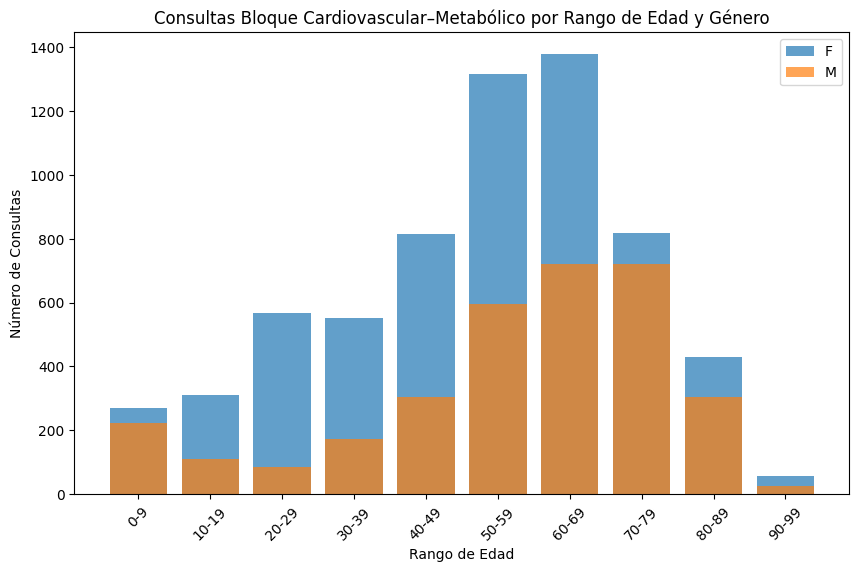

In [17]:
cardio_especialidades = [
    'medicina interna', 'nutricionista']

df_cardio = df[df['especialidad'].isin(cardio_especialidades)]

# Agrupar por rango de edad y género
cardio_group = df_cardio.groupby(['rango_edad', 'genero']).size().reset_index(name='consultas')

# Gráfico
plt.figure(figsize=(10,6))
for genero in cardio_group['genero'].unique():
    sub = cardio_group[cardio_group['genero'] == genero]
    plt.bar(sub['rango_edad'], sub['consultas'], alpha=0.7, label=genero)

plt.title("Consultas Bloque Cardiovascular–Metabólico por Rango de Edad y Género")
plt.xlabel("Rango de Edad")
plt.ylabel("Número de Consultas")
plt.legend()
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-3015480615.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  musculo_group = df_musculo.groupby(['rango_edad', 'genero']).size().reset_index(name='consultas')


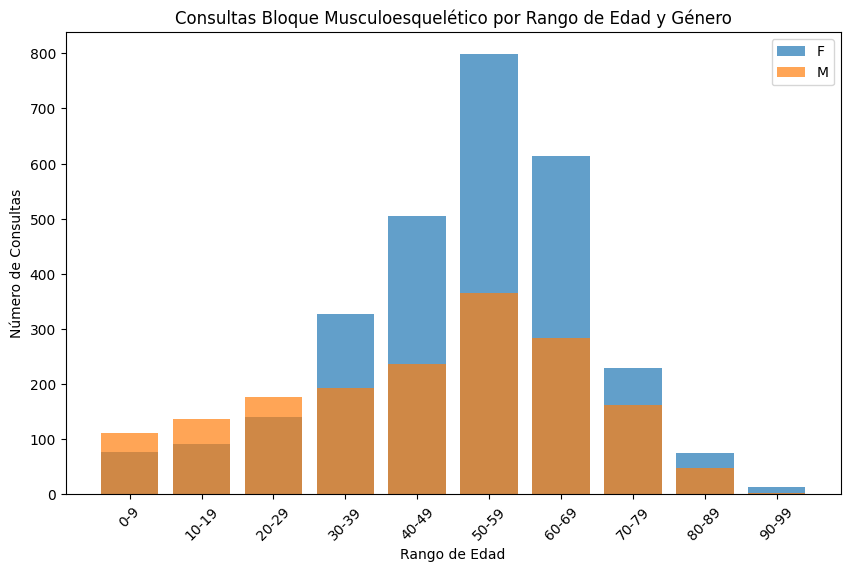

In [18]:
musculo_especialidades = [
    'ortopedia', 'fisioterapia'
]

df_musculo = df[df['especialidad'].isin(musculo_especialidades)]

musculo_group = df_musculo.groupby(['rango_edad', 'genero']).size().reset_index(name='consultas')

plt.figure(figsize=(10,6))
for genero in musculo_group['genero'].unique():
    sub = musculo_group[musculo_group['genero'] == genero]
    plt.bar(sub['rango_edad'], sub['consultas'], alpha=0.7, label=genero)

plt.title("Consultas Bloque Musculoesquelético por Rango de Edad y Género")
plt.xlabel("Rango de Edad")
plt.ylabel("Número de Consultas")
plt.legend()
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-1592403907.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mental_group = df_mental.groupby(['rango_edad', 'genero']).size().reset_index(name='consultas')


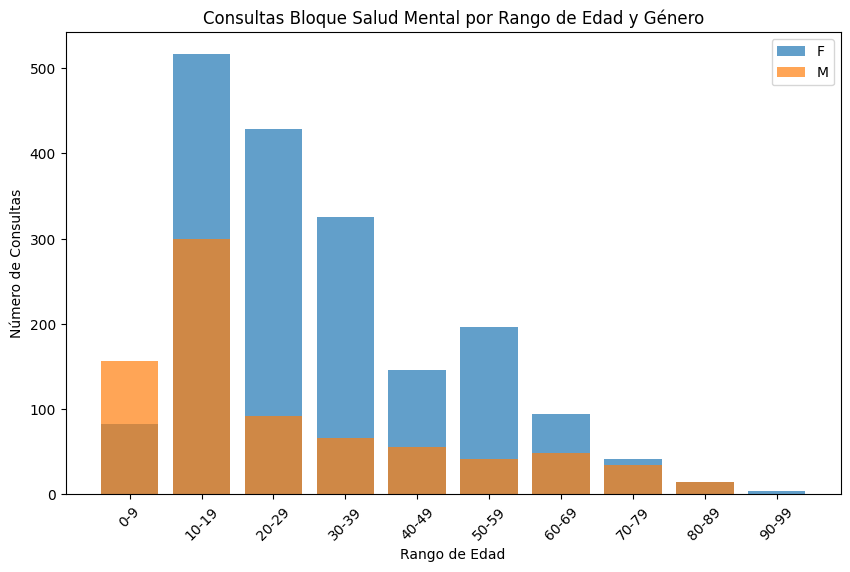

In [19]:
mental_especialidades = [
    'psicologia', 'trabajo social']

df_mental = df[df['especialidad'].isin(mental_especialidades)]

mental_group = df_mental.groupby(['rango_edad', 'genero']).size().reset_index(name='consultas')

plt.figure(figsize=(10,6))
for genero in mental_group['genero'].unique():
    sub = mental_group[mental_group['genero'] == genero]
    plt.bar(sub['rango_edad'], sub['consultas'], alpha=0.7, label=genero)

plt.title("Consultas Bloque Salud Mental por Rango de Edad y Género")
plt.xlabel("Rango de Edad")
plt.ylabel("Número de Consultas")
plt.legend()
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-3570320479.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bloques_genero_edad = df_bloques.groupby(["BLOQUE", "genero", "rango_edad"]).size().reset_index(name="cantidad")


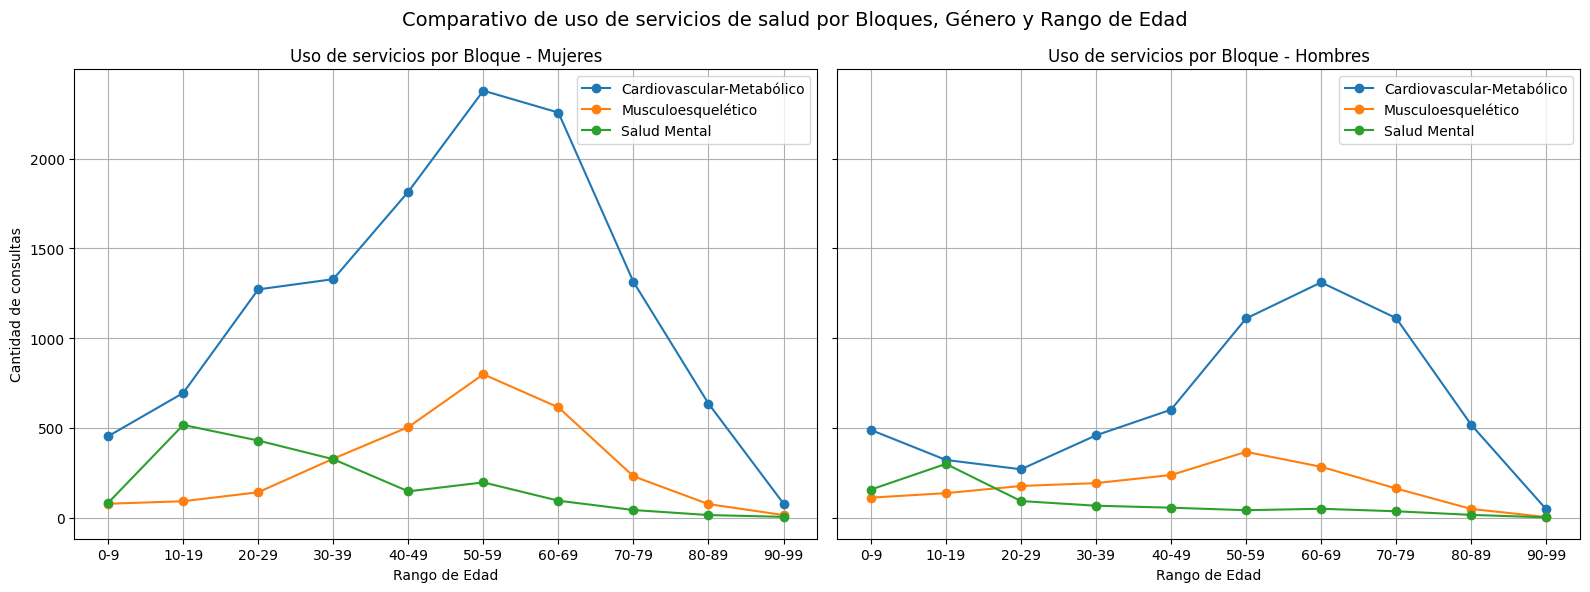

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Definir los bloques ---
bloque_cardiometabolico = ["medicina interna", "imageneologia", "imagen-electro", "nutricionista"
]

bloque_musculoesqueletico = [
    "ortopedia", "fisioterapia"]

bloque_salud_mental = [
    "psicologia", "trabajo social"]

# --- Crear una nueva columna para asignar cada especialidad a un bloque ---
def asignar_bloque(especialidad):
    if especialidad in bloque_cardiometabolico:
        return "Cardiovascular-Metabólico"
    elif especialidad in bloque_musculoesqueletico:
        return "Musculoesquelético"
    elif especialidad in bloque_salud_mental:
        return "Salud Mental"
    else:
        return "Otro"

df["BLOQUE"] = df["especialidad"].apply(asignar_bloque)

# --- Filtrar solo los 3 bloques ---
df_bloques = df[df["BLOQUE"].isin(["Cardiovascular-Metabólico", "Musculoesquelético", "Salud Mental"])]

# --- Agrupar por bloque, género y rango de edad ---
bloques_genero_edad = df_bloques.groupby(["BLOQUE", "genero", "rango_edad"]).size().reset_index(name="cantidad")

# --- Graficar por género ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Gráfico para mujeres
mujeres = bloques_genero_edad[bloques_genero_edad["genero"] == "F"]
for bloque in mujeres["BLOQUE"].unique():
    subset = mujeres[mujeres["BLOQUE"] == bloque]
    axes[0].plot(subset["rango_edad"], subset["cantidad"], marker="o", label=bloque)

axes[0].set_title("Uso de servicios por Bloque - Mujeres")
axes[0].set_xlabel("Rango de Edad")
axes[0].set_ylabel("Cantidad de consultas")
axes[0].legend()
axes[0].grid(True)

# Gráfico para hombres
hombres = bloques_genero_edad[bloques_genero_edad["genero"] == "M"]
for bloque in hombres["BLOQUE"].unique():
    subset = hombres[hombres["BLOQUE"] == bloque]
    axes[1].plot(subset["rango_edad"], subset["cantidad"], marker="o", label=bloque)

axes[1].set_title("Uso de servicios por Bloque - Hombres")
axes[1].set_xlabel("Rango de Edad")
axes[1].legend()
axes[1].grid(True)

plt.suptitle("Comparativo de uso de servicios de salud por Bloques, Género y Rango de Edad", fontsize=14)
plt.tight_layout()
plt.show()


In [22]:
# Asignar bloque según especialidad
def asignar_bloque(especialidad):
    if especialidad in ['medicina interna','nutricionista','optometria','pyp']:
        return 'Cardiovascular-Metabólico'
    elif especialidad in ['ortopedia','fisioterapia','rehabilitacion','traumatologia']:
        return 'Musculoesquelético'
    elif especialidad in ['psicologia','trabajo social','psiquiatria']:
        return 'Salud Mental'
    else:
        return None

df['Bloque'] = df['especialidad'].apply(asignar_bloque)
# Agrupar por rango de edad, género y bloque
comparativo = (df.groupby(['rango_edad','genero','Bloque'])
                 .size()
                 .reset_index(name='consultas'))

print(comparativo.head())

# Filtrar solo salud mental y rango 20-29
sm_20_29 = comparativo[(comparativo['Bloque'] == 'Salud Mental') &
                       (comparativo['rango_edad'] == '20-29')]

# Calcular totales y diferencia
hombres = sm_20_29.loc[sm_20_29['genero'] == 'M', 'consultas'].values[0]
mujeres = sm_20_29.loc[sm_20_29['genero'] == 'F', 'consultas'].values[0]

diferencia = mujeres - hombres
diferencia_pct = (diferencia / hombres) * 100 if hombres > 0 else None

print(f"Salud mental (20-29 años): Hombres={hombres}, Mujeres={mujeres}, "
      f"Diferencia={diferencia} ({diferencia_pct:.2f}%)")
# Agrupar rangos 0-9, 10-19, 20-29
me_0_29 = comparativo[(comparativo['Bloque'] == 'Musculoesquelético') &
                      (comparativo['rango_edad'].isin(['0-9','10-19','20-29']))]

# Sumar por género
me_0_29_totales = me_0_29.groupby('genero')['consultas'].sum()
hombres = me_0_29_totales['M']
mujeres = me_0_29_totales['F']

diferencia = mujeres - hombres
diferencia_pct = (diferencia / hombres) * 100 if hombres > 0 else None

print(f"Musculoesquelético (0-29 años): Hombres={hombres}, Mujeres={mujeres}, "
      f"Diferencia={diferencia} ({diferencia_pct:.2f}%)")
# Filtrar 30-39
me_30_39 = comparativo[(comparativo['Bloque'] == 'Musculoesquelético') &
                       (comparativo['rango_edad'] == '30-39')]

hombres = me_30_39.loc[me_30_39['genero'] == 'M', 'consultas'].values[0]
mujeres = me_30_39.loc[me_30_39['genero'] == 'F', 'consultas'].values[0]

diferencia = mujeres - hombres
diferencia_pct = (diferencia / hombres) * 100 if hombres > 0 else None

print(f"Musculoesquelético (30-39 años): Hombres={hombres}, Mujeres={mujeres}, "
      f"Diferencia={diferencia} ({diferencia_pct:.2f}%)")


  rango_edad genero                     Bloque  consultas
0        0-9      F  Cardiovascular-Metabólico       1455
1        0-9      F         Musculoesquelético         77
2        0-9      F               Salud Mental         82
3        0-9      M  Cardiovascular-Metabólico       1475
4        0-9      M         Musculoesquelético        111
Salud mental (20-29 años): Hombres=92, Mujeres=429, Diferencia=337 (366.30%)
Musculoesquelético (0-29 años): Hombres=423, Mujeres=309, Diferencia=-114 (-26.95%)
Musculoesquelético (30-39 años): Hombres=192, Mujeres=328, Diferencia=136 (70.83%)


/tmp/ipython-input-2409000210.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  comparativo = (df.groupby(['rango_edad','genero','Bloque'])


El análisis comparativo por género y edad en los tres bloques de servicios muestra diferencias significativas en los patrones de uso.

En el **bloque cardiovascular–metabólico**, las mujeres presentan una demanda mayor en todos los grupos etarios, con un pico en la adultez media, lo que refleja la importancia de la atención de enfermedades crónicas en este grupo.

En contraste, en el **bloque musculoesquelético**, los hombres predominan en la niñez y juventud: entre 0 y 29 años tuvieron un **27%** más de consultas que las mujeres (423 vs. 309), probablemente por accidentes o lesiones. Sin embargo, a partir de los 30 a 39 años ocurre un cambio importante, ya que las mujeres superan la demanda con un **71%** más de consultas que los hombres (328 vs. 192), lo que podría asociarse al desgaste físico y a condiciones reumatológicas.

Finalmente, en el **bloque de salud mental**, los niños varones muestran mayor uso en la primera infancia, pero en la adolescencia las mujeres comienzan a duplicar las consultas. Entre los 20 y 29 años, por ejemplo, ellas registran 429 consultas frente a 92 de los hombres, es decir, una diferencia del **366%.** Esta brecha se mantiene en la adultez, reforzando la hipótesis de que las mujeres presentan mayor apertura para buscar ayuda psicológica, mientras que los hombres tienden a invisibilizar o postergar el cuidado en esta área.

In [52]:
df["especialidad"].value_counts()

,count
especialidad,
medicina general,43648
odontologia,8159
imagenologia diagnostica,7991
pyp,6005
medicina interna,5617
nutricionista,4149
optometria,3487
pediatria,3484
higienista oral,3484


In [53]:
df["especialidad_unificada"] = df["especialidad"].replace({
    "optometria": "salud_visual",
    "oftalmologia": "salud_visual"
})

# 🔹 Verificar conteo después de unificación
print(df["especialidad_unificada"].value_counts())

especialidad_unificada
medicina general                43648
odontologia                      8159
imagenologia diagnostica         7991
salud_visual                     6889
pyp                              6005
medicina interna                 5617
nutricionista                    4149
higienista oral                  3484
pediatria                        3484
ortopedia                        3272
medicina general obstetricia     3260
citologia                        2591
psicologia                       2520
cirugia general                  2014
ginecologia                      1900
imagen-electro                   1850
urologia                         1347
anesteciologia                   1320
fisioterapia                     1314
medicina general prioritaria      996
gineco-obstetricia                846
postquirurgico cirugia            619
postquirurgico ortopedia          589
postquirurgico ginecologia        500
monitoreo                         300
trabajo social             

Especialidades seleccionadas: especialidad
odontologia                 8159
imagenologia diagnostica    7991
pyp                         6005
medicina interna            5617
Name: count, dtype: int64


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Reporte de Clasificación:
                          precision    recall  f1-score   support

imagenologia diagnostica       0.36      0.39      0.37      2397
        medicina interna       0.45      0.50      0.47      1685
             odontologia       0.40      0.36      0.38      2448
                     pyp       0.45      0.41      0.42      1802

                accuracy                           0.41      8332
               macro avg       0.41      0.41      0.41      8332
            weighted avg       0.41      0.41      0.41      8332



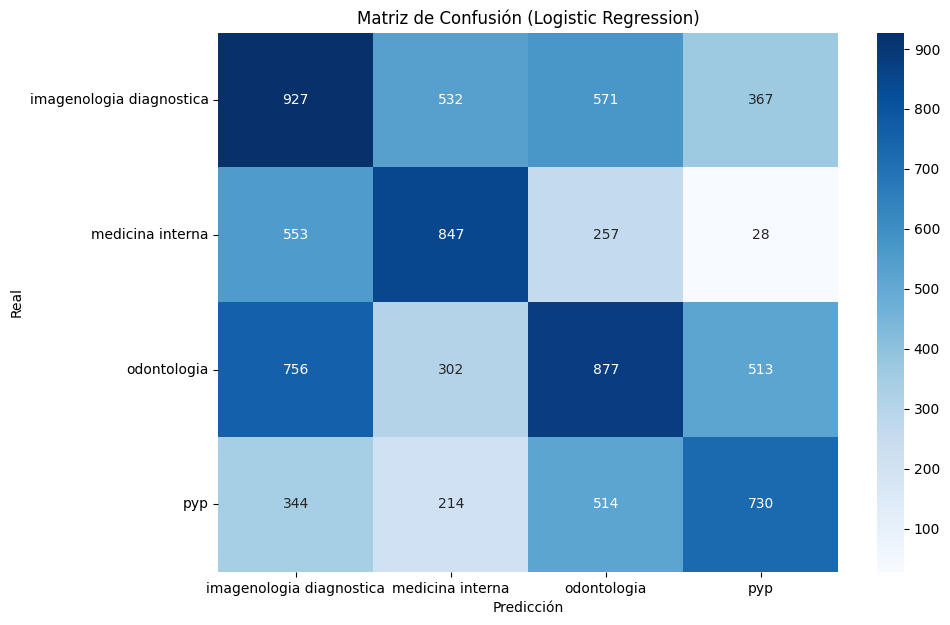

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
seis_especialidades = [
    "odontologia",
    "pyp",
    "medicina interna",
    "salud_visual",
    "imagenologia diagnostica"
]

# 🔹 2. Filtrar el DataFrame
df_top6 = df[df["especialidad"].isin(seis_especialidades)]

print("Especialidades seleccionadas:", df_top6["especialidad"].value_counts())

# 🔹 3. Variables predictoras y target
X = df_top6[["edad", "genero", "regimen"]]
y = df_top6["especialidad"]

# Convertir categóricas a dummies
X = pd.get_dummies(X, drop_first=True)

# 🔹 4. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 🔹 5. Regresión logística
log_reg = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs",
    max_iter=1000
)
log_reg.fit(X_train, y_train)

# 🔹 6. Predicciones
y_pred = log_reg.predict(X_test)

# 🔹 7. Reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# 🔹 8. Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=log_reg.classes_)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=log_reg.classes_,
            yticklabels=log_reg.classes_)
plt.title("Matriz de Confusión (Logistic Regression)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


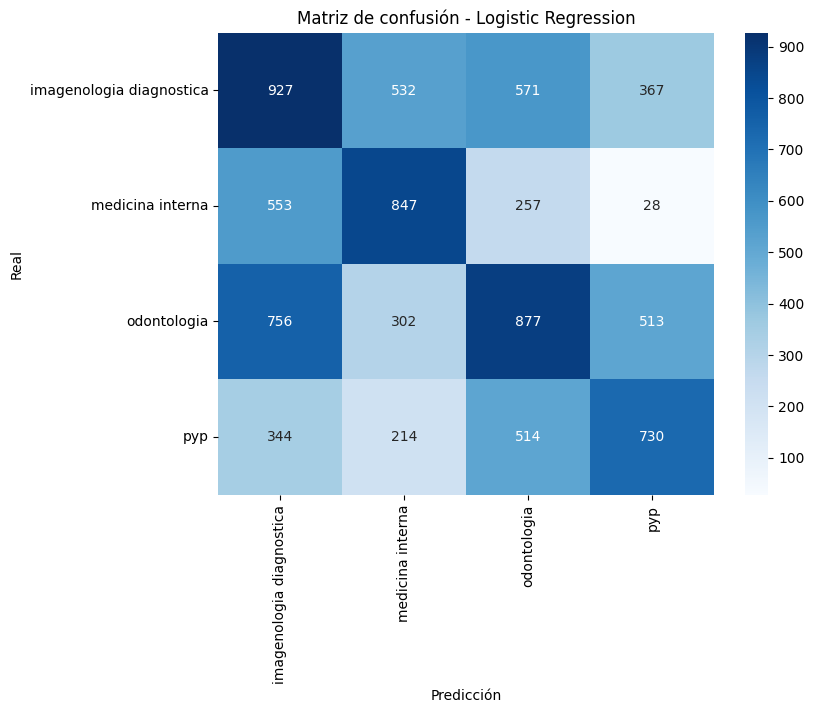

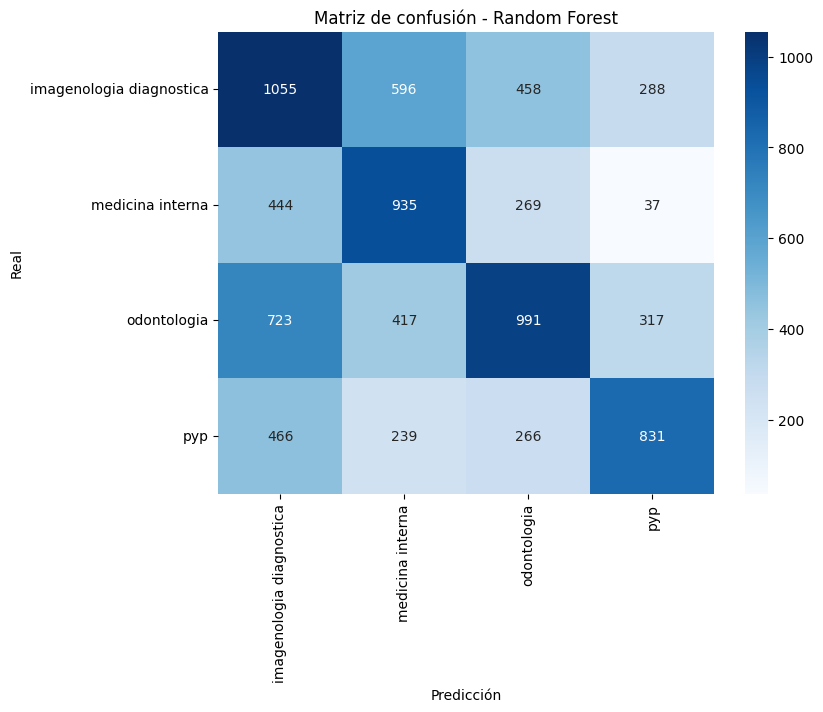

--- Logistic Regression ---
Accuracy: 0.406
F1-score (macro): 0.411
F1-score (weighted): 0.405

--- Random Forest ---
Accuracy: 0.458
F1-score (macro): 0.463
F1-score (weighted): 0.458



In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Nombres de las clases (ajústalos según tu dataset)
class_names = ["imagenologia diagnostica", "medicina interna", "odontologia", "pyp"]

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Guardamos métricas
    report = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)
    results[name] = report

    # Mostramos matriz de confusión
    plt.figure(figsize=(8,6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Matriz de confusión - {name}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

# Comparar métricas
for model_name, report in results.items():
    print(f"--- {model_name} ---")
    print("Accuracy:", round(report["accuracy"], 3))
    print("F1-score (macro):", round(report["macro avg"]["f1-score"], 3))
    print("F1-score (weighted):", round(report["weighted avg"]["f1-score"], 3))
    print()


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

# Diccionario de modelos
modelos = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": MultinomialNB(),
    "SVM": SVC(kernel="linear", random_state=42)
}

resultados = []

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    resultados.append({
        "Modelo": nombre,
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1-Macro": f1_score(y_test, y_pred, average="macro"),
        "F1-Weighted": f1_score(y_test, y_pred, average="weighted")
    })

df_resultados = pd.DataFrame(resultados)
print(df_resultados)


                Modelo  Accuracy  F1-Macro  F1-Weighted
0  Logistic Regression  0.405785  0.411487     0.405073
1        Random Forest  0.459313  0.464796     0.459848
2    Gradient Boosting  0.460874  0.466349     0.460889
3                  KNN  0.402904  0.407131     0.405682
4          Naive Bayes  0.341455  0.224147     0.257233
5                  SVM  0.427988  0.430501     0.420993


Se probaron distintos algoritmos de clasificación para predecir la especialidad médica más probable de atención de los usuarios a partir de variables como edad, género y régimen, disponibles en este dataset.

Los modelos basados en árboles de decisión ensamblados (Random Forest y Gradient Boosting) obtuvieron el mejor rendimiento, con un accuracy cercano al 46% y un F1-Macro de 0.46, lo que indica un desempeño relativamente equilibrado entre las distintas clases.



**CONCLUSIONES**

Este proyecto analizó la demanda de servicios médicos en Boyacá a partir de las enfermedades más comunes señaladas en el Plan de Desarrollo, con énfasis en causas de mortalidad, patologías musculoesqueléticas y salud mental. Se exploraron diferencias por género y rangos de edad, identificando patrones relevantes en la utilización de especialidades. Posteriormente, se construyeron modelos predictivos para anticipar la especialidad médica según variables demográficas, donde Random Forest y Gradient Boosting alcanzaron los mejores resultados (≈46% de exactitud), demostrando la utilidad de los enfoques de ensamble frente a métodos más simples. En conjunto, el trabajo logró integrar análisis descriptivo y predictivo, aportando evidencia para la planificación de servicios de salud y la optimización de recursos en el departamento.